In [68]:
#Measure Andriy's beam widths in photo from Structure 2 with averaging instead of just using a ruler at a few points
#CKH Aug 16,2018
from scipy import misc #for image reading
import numpy as np


In [69]:
x=misc.imread('ChevbotBeamImage.tif')

In [70]:
#x[500,200,0], x[500,200,1],x[500,200,2] #all values same, it is a grayscale image so I can use R G or B channel

In [71]:
xgray=x[:,:,0]#Get red channel then

profile=[]  
for i in range(xgray.shape[0]):
    profile.append (np.mean(xgray[i,:]))#average brightness across ith row  (or, column in the rotated pic below)

In [72]:
profile=np.array(profile)


(-0.5, 639.5, 206.5, -0.5)

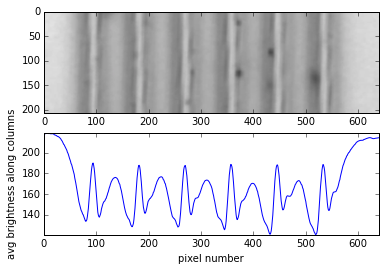

In [73]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.subplot(2,1,2)
plt.plot(profile)
plt.ylabel('avg brightness along columns')
plt.xlabel('pixel number')
plt.axis('tight')
plt.subplot(2,1,1)
plt.imshow(np.rot90(x))

plt.axis('tight')
#Sharp peaks are centers of beams, wider peaks are centers of gaps. Local minima are at the boundary between  beam and gap

In [74]:
#Find local minima in the profile by returning the index of all points lower than their neighbors
#Best on smooth data, this data is kinda smooth because of the averaging along columns
LocalMins=np.r_[True, profile[1:] < profile[:-1]] & np.r_[profile[:-1] < profile[1:], True]

#Then find out the index of each local min
np.where(LocalMins==True)[0]

array([ 15,  80, 106, 168, 193, 256, 281, 345, 369, 432, 456, 468, 519,
       544, 605, 609, 630, 634])

In [75]:
#looking at the plot vs image, here are the 6 real beam edge locations 
BeamEdges=[80,106,168,193,256,281,345,369,432,456,519,544]
BeamLeftEdges=np.array(BeamEdges[0::2])
BeamRightEdges=np.array(BeamEdges[1::2])

In [76]:
BeamWidths=BeamRightEdges-BeamLeftEdges
BeamLeftSeparations=np.diff(BeamLeftEdges)  #This distance should stay at 15 microns no matter the etch bias
BeamRightSeparations=np.diff(BeamRightEdges)

MeanSeparationPixels=np.mean([np.mean(BeamLeftSeparations),np.mean(BeamRightSeparations)])
MeanBeamWidthPixels=np.mean(BeamWidths)
MicronsPerPixel=15/MeanSeparationPixels 
MeanBeamWidthMicrons=MeanBeamWidthPixels*MicronsPerPixel
MeanSeparation,MicronsPerPixel,MeanBeamWidthPixels,MeanBeamWidthMicrons

(87.699999999999989,
 0.17103762827822122,
 24.833333333333332,
 4.2474344355758271)

Beam width 4.25 microns

In [77]:
#redraw structure with thinner beams in 2d, then extrude